In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from scnn.convertors import F2S, S2F
from scnn.bipolar_functions.operations import *

In [2]:
x_in = torch.rand(500,1,10) * 2 -1
y_in = torch.rand(500, 10,1) * 2 -1
(x_in@y_in).squeeze().shape

torch.Size([500])

In [130]:
def get_mae(seq_len, input_dim, scalar):
    
    f2s = F2S(seq_len)
    s2f = S2F()
    x_in =(torch.rand(100,input_dim) * 2 -1) 
    y_in =(torch.rand(100,input_dim) * 2 -1)
    x_in_s = f2s(x_in)
    y_in_s = f2s(y_in)
    ground = torch.tanh(scalar* (x_in * y_in).sum(-1)) #shape = [500]
    print(torch.abs(ground).sum()/100)
    mode = 'mux'
    if mode == 'mux':
        out = []
        for i in range(100):
            dot = scaled_dot(x_in_s[i],y_in_s[i])

            out.append(s2f(stanh(dot,int(2*input_dim*scalar))))
        mae_1 = torch.abs(torch.stack(out) -ground).mean()
        # return mae

    mode = 'apc'
    if mode == 'apc':
        inputs = mul(x_in_s,y_in_s)
        
        r = get_btanh_states(input_dim, scalar)
        print('state_number',r)
        out = s2f(apc_btanh(inputs, r=r, num_au_layers=0))
        mae_2 = torch.abs(out-ground).mean()

    
    mode = 'axpc'
    if mode == 'axpc':
        out = s2f(apc_btanh(inputs, r=r, num_au_layers=1))
        mae_3 = torch.abs(out-ground).mean()
        # 
    # print('mux',mae_1)
    # print('apc',mae_2)
    # print('axpc',mae_3)
    return mae_1, mae_2, mae_3

In [131]:
get_mae(seq_len=256, input_dim=100,scalar=0.5)

tensor(0.7482)
state_number 90


(tensor(0.6386), tensor(0.1220), tensor(0.1370))

In [132]:
np.tanh(0.5991*2)

0.8331047465040887

tensor(0.5818)
state_number 16
tensor(0.6152)
state_number 32
tensor(0.7070)
state_number 64
tensor(0.7487)
state_number 128
tensor(0.8338)
state_number 256
tensor(0.8656)
state_number 512
tensor(0.9729)
state_number 1024
tensor(0.9151)
state_number 2048


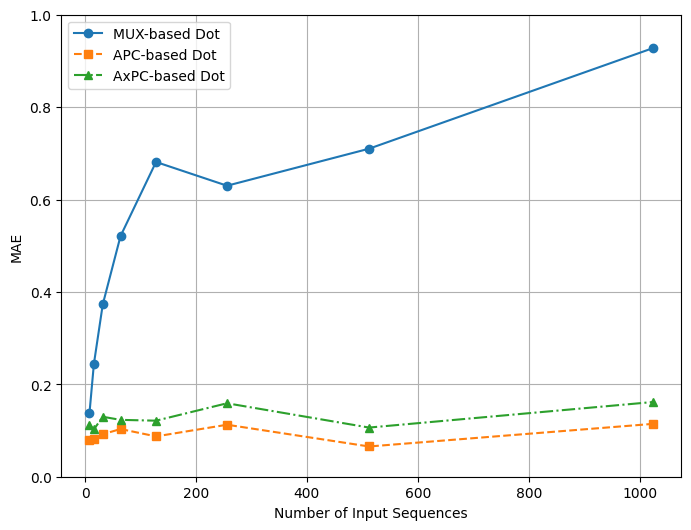

In [137]:
import numpy as np
import matplotlib.pyplot as plt

# 横轴上的点
x_values = [8, 16, 32, 64, 128, 256, 512, 1024]

# 假设函数值为随机生成的一些数据
y_values = [get_mae(1024,x,1) for x in x_values]
y1_values = [y[0] for y in y_values]
y2_values = [y[1] for y in y_values]
y3_values = [y[2] for y in y_values]
# 绘制图像
plt.figure(figsize=(8, 6))
plt.plot(x_values, y1_values, label='MUX-based Dot', marker='o', linestyle='-')
plt.plot(x_values, y2_values, label='APC-based Dot', marker='s', linestyle='--')
plt.plot(x_values, y3_values, label='AxPC-based Dot', marker='^', linestyle='-.')
plt.ylim(0,1)
plt.xlabel('Number of Input Sequences')
plt.ylabel('MAE')
# plt.title('MAE')
plt.grid(True)
plt.legend()
plt.show()
